In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

<function matplotlib.pyplot.show(close=None, block=None)>

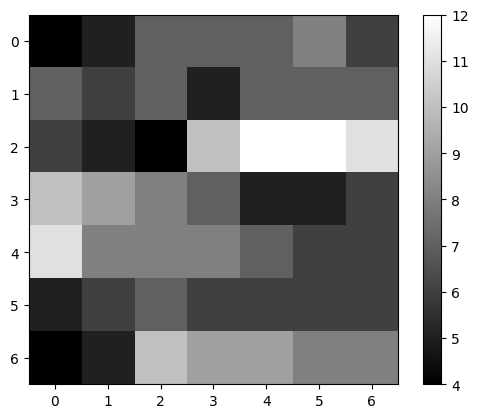

In [2]:
Matriz = np.array([
    [4, 5, 7, 7, 7, 8, 6],
    [7, 6, 7, 5, 7, 7, 7],
    [6, 5, 4, 10, 12, 12, 11],
    [10, 9, 8, 7, 5, 5, 6],
    [11, 8, 8, 8, 7, 6, 6],
    [5, 6, 7, 6, 6, 6, 6],
    [4, 5, 10, 9, 9, 8, 8]
], dtype = np.uint8)

plt.imshow(Matriz, cmap = 'gray')
plt.colorbar()
plt.show

In [3]:
def histograma(Matriz, nbins):
    N, M = Matriz.shape

    hist = np.zeros(nbins).astype(int)

    for x in range(N):
        for y in range(M):
            hist[Matriz[x, y]] += 1

    return hist

In [4]:
hist_A = histograma(Matriz, 13)
print(hist_A)

[ 0  0  0  0  3  7 11 11  7  3  3  2  2]


Text(0, 0.5, 'Frequência')

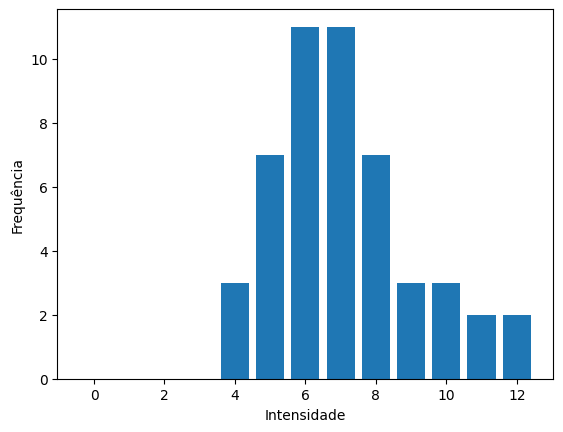

In [5]:
plt.bar(range(13), hist_A)
plt.xlabel('Intensidade')
plt.ylabel('Frequência')

In [6]:
def histograma_acumulado(Matriz, nbins):
    hist = histograma(Matriz, nbins)

    histC = np.zeros(nbins).astype(int)
    histC[0] = hist[0]

    for i in range(1, nbins):
        histC[i] = hist[i] + histC[i - 1]

    return histC

hist_acumulado = histograma_acumulado(Matriz, 13)

Text(0, 0.5, 'Frequência')

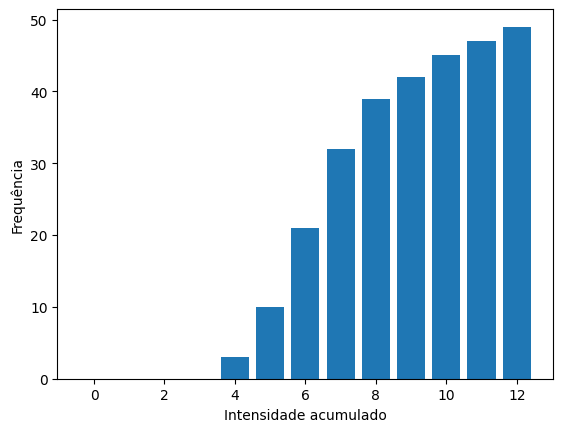

In [7]:
plt.bar(range(13), hist_acumulado)
plt.xlabel('Intensidade acumulado')
plt.ylabel('Frequência')

In [8]:
def histograma_normalizado(Matriz, nbins):
    N, M = Matriz.shape

    hist = np.zeros(nbins).astype(int)

    for x in range(N):
        for y in range(M):
            hist[Matriz[x, y]] += 1

    total_pixels = N * M
    hist_normalizado = hist / total_pixels

    return hist_normalizado

hist_normalizado = histograma_normalizado(Matriz, 13)

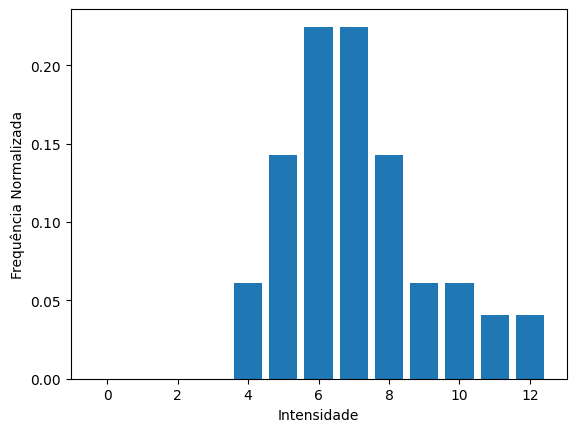

In [9]:
plt.bar(range(13), hist_normalizado)
plt.xlabel('Intensidade')
plt.ylabel('Frequência Normalizada')
plt.show()

In [10]:
def histograma_acumulado_normalizado(Matriz, nbins):
    hist_normalizado = histograma_normalizado(Matriz, nbins)

    hist_acumulado_normalizado = np.zeros(nbins).astype(float)
    hist_acumulado_normalizado[0] = hist_normalizado[0]

    for i in range(1, nbins):
        hist_acumulado_normalizado[i] = hist_acumulado_normalizado[i - 1] + hist_normalizado[i]

    return hist_acumulado_normalizado

hist_acumulado_normalizado = histograma_acumulado_normalizado(Matriz, 13)

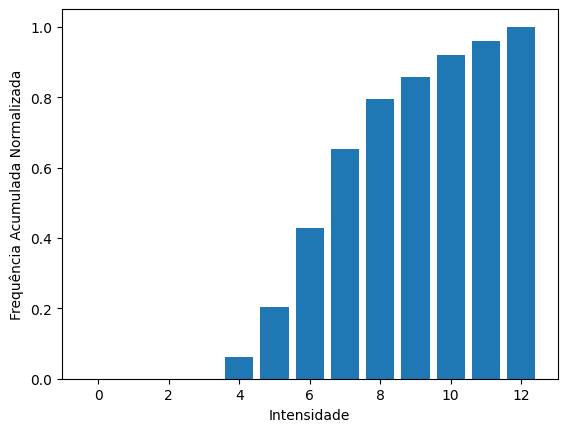

In [11]:
plt.bar(range(13), hist_acumulado_normalizado)
plt.xlabel('Intensidade')
plt.ylabel('Frequência Acumulada Normalizada')
plt.show()

In [12]:
def transformar_contraste(Matriz):
    Xmin = np.min(Matriz)
    Xmax = np.max(Matriz)

    a = 255 / (Xmax - Xmin)

    b = -a * Xmin

    Matriz_resultante = a * Matriz + b
    Matriz_resultante = np.clip(Matriz_resultante, 0, 255)
    Matriz_resultante = Matriz_resultante.astype(np.uint8)

    return Matriz_resultante

Matriz_resultante = transformar_contraste(Matriz)

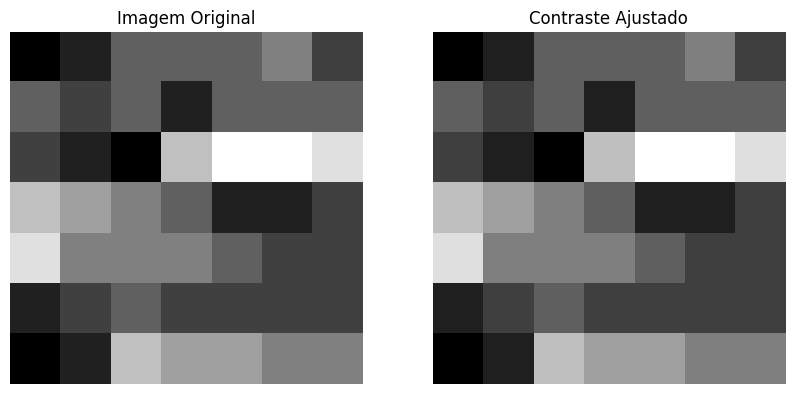

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Matriz, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Matriz_resultante, cmap='gray')
plt.title('Contraste Ajustado')
plt.axis('off')

plt.show()

In [27]:
ma = np.hstack((Matriz, Matriz_resultante))

cv2.imwrite('/content/ex1_plot/1e.png', ma)

True

In [14]:
def comprimir_imagem(Matriz):
    Matriz_comprimida = np.zeros_like(Matriz)

    Matriz_comprimida[Matriz <= 8] = 8
    Matriz_comprimida[(Matriz > 8) & (Matriz < 11)] = 8
    Matriz_comprimida[Matriz >= 11] = 8

    return Matriz_comprimida

Matriz_comprimida = comprimir_imagem(Matriz)

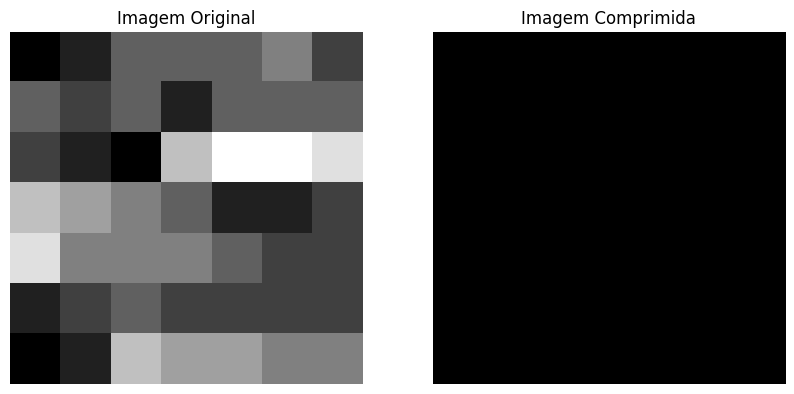

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Matriz, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Matriz_comprimida, cmap='gray')
plt.title('Imagem Comprimida')
plt.axis('off')

plt.show()

In [28]:
mb = np.hstack((Matriz, Matriz_comprimida))

cv2.imwrite('/content/ex1_plot/1f.png', mb)

True

(-0.5, 779.5, 519.5, -0.5)

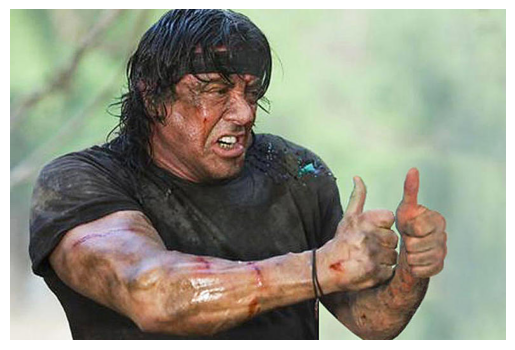

In [17]:
img1 = cv2.imread("img1.jpg")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [18]:
def transformar_negativo(img, p1, p2):
    x1, y1 = p1
    x2, y2 = p2

    x1 = max(0, min(x1, img.shape[1] - 1))
    y1 = max(0, min(y1, img.shape[0] - 1))
    x2 = max(0, min(x2, img.shape[1] - 1))
    y2 = max(0, min(y2, img.shape[0] - 1))

    img[y1:y2, x1:x2] = 255 - img[y1:y2, x1:x2]

    return img

In [19]:
P1 = (50, 50)
P2 = (350, 350)

img_modificada = transformar_negativo(img=img1.copy(), p1=P1, p2=P2)

(-0.5, 779.5, 519.5, -0.5)

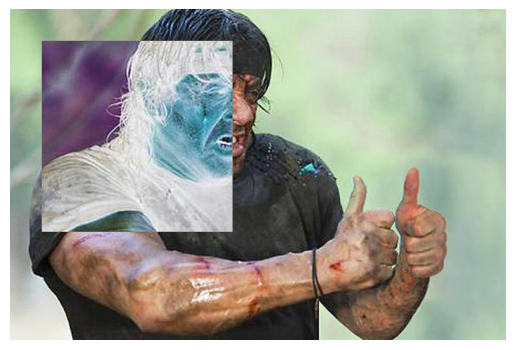

In [20]:
plt.imshow(cv2.cvtColor(img_modificada, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [26]:
cv2.imwrite('/content/ex2_plot/2a.png', img_modificada)

True

In [22]:
def equalizar_histograma_regiao(img, p1, p2):
    x1, y1 = p1
    x2, y2 = p2

    x1 = max(0, min(x1, img.shape[1] - 1))
    y1 = max(0, min(y1, img.shape[0] - 1))
    x2 = max(0, min(x2, img.shape[1] - 1))
    y2 = max(0, min(y2, img.shape[0] - 1))

    regiao = img[y1:y2, x1:x2]

    if len(regiao.shape) == 3:
        regiao_gray = cv2.cvtColor(regiao, cv2.COLOR_BGR2GRAY)
        regiao_equalizada = cv2.equalizeHist(regiao_gray)
        regiao_equalizada = cv2.cvtColor(regiao_equalizada, cv2.COLOR_GRAY2BGR)
    else:
        regiao_equalizada = cv2.equalizeHist(regiao)

    img[y1:y2, x1:x2] = regiao_equalizada

    return img

In [24]:
P1 = (50, 150)
P2 = (550, 450)

img_modificada1 = equalizar_histograma_regiao(img1.copy(), P1, P2)

(-0.5, 779.5, 519.5, -0.5)

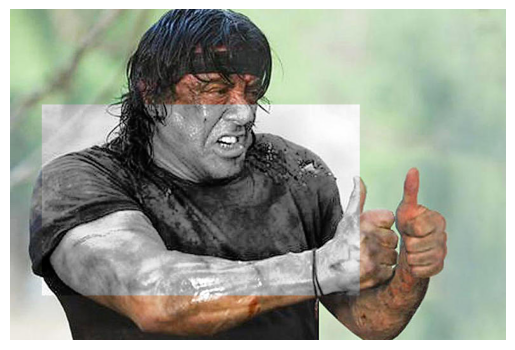

In [25]:
plt.imshow(cv2.cvtColor(img_modificada1, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [29]:
cv2.imwrite('/content/ex3_plot/3a.png', img_modificada1)

True